In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Win Rate exploration ###

In [2]:
data = pd.read_csv('/Users/jbrubaker/projects/copra_project/copra_hw/data/NA/train_qt.csv')
dat = data.loc[data['tier_3'].eq(18)].reset_index(drop=True)  # tier_3=18 has the largest count of bids
# print data.columns
dat.head()

,quoteid,value_qt,list_qt,quoted_qt,tmc_qt,leading_brand,leading_brand_value,leading_brand_pct,upgmes,countrycode,...,gap_ev,tc,discount_qt,q_v,tier_0,tier_1,tier_2,ln_value_MIN,ln_value_MAX,tier_3
0,4299931,257.966927,350.0,231.000,35.000,OTHER POWER,257.966927,1.000000,0,US,...,0.355385,0,0.340000,0.892006,all,OTHER POWER,1,0.0,11.76524,18
1,4300199,37774.438375,59166.0,38614.934,22723.487,OTHER POWER,32278.135867,0.854497,0,US,...,0.566282,0,0.347346,1.022223,all,OTHER POWER,1,0.0,11.76524,18
2,4300305,16089.370359,23721.0,15796.510,9237.671,OTHER POWER,16089.370359,1.000000,0,US,...,0.474298,0,0.334071,0.981737,all,OTHER POWER,1,0.0,11.76524,18
3,4300483,7937.678340,12005.0,7923.300,1200.500,OTHER POWER,7937.678340,1.000000,0,US,...,0.512342,0,0.340000,0.998063,all,OTHER POWER,1,0.0,11.76524,18
4,4301548,3758.212419,5540.0,3688.800,554.000,OTHER POWER,3758.212419,1.000000,0,US,...,0.473979,0,0.334152,0.981269,all,OTHER POWER,1,0.0,11.76524,18


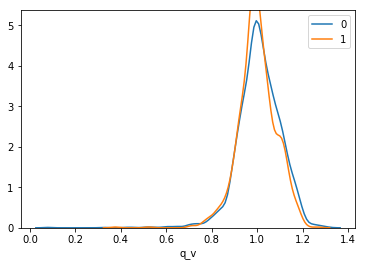

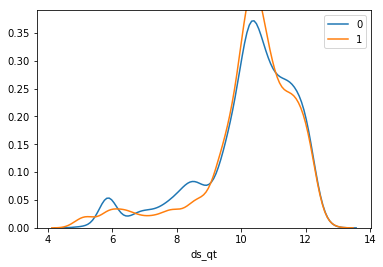

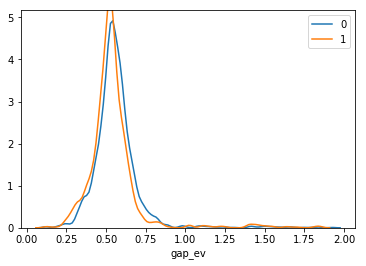

In [58]:
for feat in ['q_v', 'ds_qt', 'gap_ev']:
    plt.figure()
    for lab, grp in dat.groupby('winloss'):
        sns.distplot(grp[feat], hist=False, label=str(lab))

    plt.legend()

In [8]:
outdf = pd.read_csv('/Users/jbrubaker/projects/copra_project/copra_hw/data/NA/outdf_qt.csv')
outdf.sort_values(by='count_all_3', ascending=False).head()

,tier_0,tier_1,tier_2,tier_3,discount_avg_3,discount_std_3,discount_max_3,discount_min_3,discount_opt_3,count_all_3,count_win_3,ds_qt_3,q_v_3,gap_ev_3,const_3,tc_3,level_3
18,all,OTHER POWER,1,18,0.348440,0.066852,0.952498,0.15000,0.032765,3694.0,1219.0,0.000000,-0.446567,-0.656978,0.000000,0.660752,3.0
51,all,STORWIZE V7000,1,51,0.750060,0.066476,0.939200,0.25000,0.584754,1976.0,545.0,-0.182996,-0.930746,0.192636,1.403655,0.747329,1.0
19,all,OTHER POWER,1,19,0.448452,0.121364,0.887528,0.20000,0.060302,863.0,208.0,0.000000,-1.471296,-3.800461,2.917956,0.479381,3.0
57,all,TAPE & TAPE FRAME,1,57,0.744110,0.106922,0.952502,0.38904,0.589836,567.0,151.0,-0.184494,-1.211657,-0.164195,2.128045,0.698032,1.0
56,all,TAPE & TAPE FRAME,1,56,0.562403,0.146391,0.962000,0.15000,0.267321,447.0,172.0,-0.184494,-1.211657,-0.164195,2.128045,0.698032,1.0


In [9]:
from method_defs import regmethod
from utils import parse_regmethod
tier_list = ['tier_0', 'tier_1', 'tier_2', 'tier_3']
reg_vals = parse_regmethod(regmethod)
x_var = reg_vals[1]
suffix = len(tier_list) - 1
x_var_suff = [var + '_' + str(suffix) for var in x_var]
coef = outdf[x_var_suff + tier_list]
coef.loc[coef['tier_3'].eq(18)]

,ds_qt_3,q_v_3,gap_ev_3,const_3,tc_3,tier_0,tier_1,tier_2,tier_3
18,0.0,-0.446567,-0.656978,0.0,0.660752,all,OTHER POWER,1,18


In [10]:
# see how well the model separated out the win/loss along probability of winning, across all quotes
d = pd.merge(data, coef, on=tier_list, how='inner')
d['t'] = d['ds_qt_3'] * d['ds_qt'] + d['gap_ev_3'] * d['gap_ev'] + d['tc_3'] * d['tc'] + d['const_3'] + d['q_v_3'] * d['q_v']
d['pw'] = d['t'].apply(lambda x: 1./(1. + np.exp(-1 * x)))

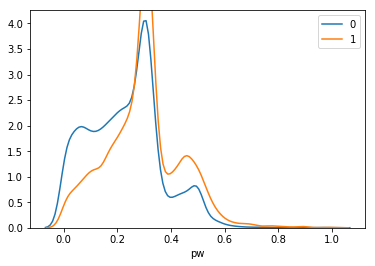

In [13]:
plt.figure()
for lab, grp in d.groupby('winloss'):
    sns.distplot(grp['pw'], hist=False, label=str(lab))

plt.legend()

### Value score exploration ###

In [15]:
vs = pd.read_csv('/Users/jbrubaker/projects/copra_project/copra_hw/data/NA/train_VS.csv')
print vs.columns
vs.head()

Index([u'quoteid', u'countrycode', u'channelid', u'customernumber',
       u'crmsectorname', u'crmindustryname', u'dombuygrpid', u'dombuygrpnam',
       u'opportunityid', u'comhwplatformid', u'ufc', u'com_componentid',
       u'value_seller', u'comlistprice', u'comtmc', u'unitcomlistprice',
       u'unitcomtmc', u'comquoteprice', u'comdelgpricel4', u'comquantity',
       u'winloss', u'comrevcat', u'comrevdivcd', u'combrand', u'comgroup',
       u'comfamily', u'commt', u'commtm', u'year', u'month', u'endofqtr',
       u'clientsegcd', u'upgmes', u'client_e', u'comloglistprice', u'indirect',
       u'comquotepricepofl', u'comdelgpricel4pofl', u'system_type',
       u'quote_date', u'comlowpofl', u'commedpofl', u'comhighpofl',
       u'commedprice', u'dealsize', u'logdealsize', u'compctcontrib',
       u'comcostpofl', u'com_cost_price', u'deal_size', u'ln_ds',
       u'com_contrib', u'discount', u'discount_pred', u'value_score'],
      dtype='object')


,quoteid,countrycode,channelid,customernumber,crmsectorname,crmindustryname,dombuygrpid,dombuygrpnam,opportunityid,comhwplatformid,...,logdealsize,compctcontrib,comcostpofl,com_cost_price,deal_size,ln_ds,com_contrib,discount,discount_pred,value_score
0,4148411,US,I,3087256,Computer Services,Computer Services,DB003R95,WIPRO LIMITED,NaN,0,...,NaN,NaN,0.080609,12934.072500,14119.102500,9.555284,0.916069,0.925,0.889516,236369.614257
1,4148411,US,I,3087256,Computer Services,Computer Services,DB003R95,WIPRO LIMITED,NaN,0,...,NaN,NaN,0.015000,338.580000,14119.102500,9.555284,0.023980,0.925,0.861197,41774.112928
2,4148411,US,I,3087256,Computer Services,Computer Services,DB003R95,WIPRO LIMITED,NaN,0,...,NaN,NaN,0.015000,846.450000,14119.102500,9.555284,0.059951,0.925,0.876479,92937.380426
3,4248728,CA,I,903658,Enterprise,Enterprise,DB500JV7,QUEBEC EDUCATION,NaN,0,...,NaN,NaN,0.178820,8435.911854,9775.842534,9.187670,0.862935,0.769,0.755634,49904.931564
4,4248728,CA,I,903658,Enterprise,Enterprise,DB500JV7,QUEBEC EDUCATION,NaN,1,...,NaN,NaN,0.100000,956.424047,9775.842534,9.187670,0.097835,0.769,0.823998,7287.126395


In [50]:
vs.corr()['discount']

quoteid              -0.057757
customernumber        0.078693
comhwplatformid      -0.015149
com_componentid       0.002576
value_seller         -0.086197
comlistprice          0.218624
comtmc                0.152960
unitcomlistprice      0.243247
unitcomtmc            0.189879
comquoteprice         0.146732
comdelgpricel4        0.095297
comquantity           0.089901
winloss              -0.058332
year                 -0.037669
month                -0.025580
endofqtr              0.024836
upgmes                0.099741
client_e             -0.036022
comloglistprice       0.581359
indirect             -0.174183
comquotepricepofl    -0.996817
comdelgpricel4pofl   -0.687607
quote_date           -0.037681
comlowpofl                 NaN
commedpofl                 NaN
comhighpofl                NaN
commedprice                NaN
dealsize                   NaN
logdealsize                NaN
compctcontrib              NaN
comcostpofl          -0.504218
com_cost_price        0.047070
deal_siz

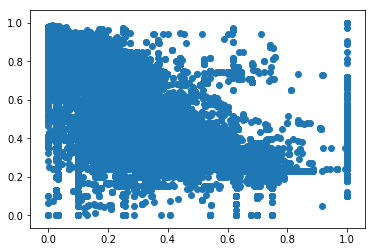

In [56]:
plt.scatter(x=vs['comcostpofl'], y=vs['discount'])